# Without discretization

In [1]:
# Graphics
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
from pysal.viz import splot
from splot.esda import plot_moran
import contextily
# Analysis
import geopandas as gpd
import pandas
from pysal.explore import esda
from pysal.lib import weights
from numpy.random import seed
import contextily as ctx

In [2]:
merida = gpd.read_file("merida_kanasing_ageb_censo_data/merida_kanasing_ageb_censo_data.shp")
print("\n dtypes: ", merida.dtypes)
print("\n shape: ", merida.shape)
print("\n list of columns: ", list(merida))


 dtypes:  CVEGEO          object
CVE_ENT         object
CVE_MUN         object
CVE_LOC         object
CVE_AGEB        object
                ...   
VPH_SINRTV      object
VPH_SINLTC      object
VPH_SINCIN      object
VPH_SINTIC      object
geometry      geometry
Length: 230, dtype: object

 shape:  (593, 230)

 list of columns:  ['CVEGEO', 'CVE_ENT', 'CVE_MUN', 'CVE_LOC', 'CVE_AGEB', 'NOM_ENT', 'NOM_MUN', 'NOM_LOC', 'POBTOT', 'POBFEM', 'POBMAS', 'P_0A2', 'P_0A2_F', 'P_0A2_M', 'P_3YMAS', 'P_3YMAS_F', 'P_3YMAS_M', 'P_5YMAS', 'P_5YMAS_F', 'P_5YMAS_M', 'P_12YMAS', 'P_12YMAS_F', 'P_12YMAS_M', 'P_15YMAS', 'P_15YMAS_F', 'P_15YMAS_M', 'P_18YMAS', 'P_18YMAS_F', 'P_18YMAS_M', 'P_3A5', 'P_3A5_F', 'P_3A5_M', 'P_6A11', 'P_6A11_F', 'P_6A11_M', 'P_8A14', 'P_8A14_F', 'P_8A14_M', 'P_12A14', 'P_12A14_F', 'P_12A14_M', 'P_15A17', 'P_15A17_F', 'P_15A17_M', 'P_18A24', 'P_18A24_F', 'P_18A24_M', 'P_15A49_F', 'P_60YMAS', 'P_60YMAS_F', 'P_60YMAS_M', 'REL_H_M', 'POB0_14', 'POB15_64', 'POB65_MAS', 'PROM_HNV', 'P

In [3]:
#merida = merida.astype(str).replace("/t","")
for col in merida.columns:
    #print(col)
    if str(merida[col].dtype) == "dtype('O')":
        merida[col] = merida[col].astype(str).replace("\t","")

In [4]:
merida.dtypes

CVEGEO          object
CVE_ENT         object
CVE_MUN         object
CVE_LOC         object
CVE_AGEB        object
                ...   
VPH_SINRTV      object
VPH_SINLTC      object
VPH_SINCIN      object
VPH_SINTIC      object
geometry      geometry
Length: 230, dtype: object

In [5]:
merida['POBTOT'].dtypes

dtype('int64')

In [6]:
merida.head(5)

,CVEGEO,CVE_ENT,CVE_MUN,CVE_LOC,CVE_AGEB,NOM_ENT,NOM_MUN,NOM_LOC,POBTOT,POBFEM,...,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCIN,VPH_SINTIC,geometry
0,3105000010027,31,050,0001,0027,Yucatán,Mérida,Total AGEB urbana,21,9,...,9,8,3,4,0,0,0,0,0,"POLYGON ((-9981448.233 2402584.366, -9981444.5..."
1,3105000010031,31,050,0001,0031,Yucatán,Mérida,Total AGEB urbana,253,128,...,107,60,31,42,30,9,0,17,0,"POLYGON ((-9965919.566 2390554.093, -9966007.0..."
2,3105000010120,31,050,0001,0120,Yucatán,Mérida,Total AGEB urbana,1444,795,...,479,414,332,175,79,6,14,84,0,"POLYGON ((-9973428.542 2392332.531, -9973426.9..."
3,3105000010154,31,050,0001,0154,Yucatán,Mérida,Total AGEB urbana,186,91,...,69,48,18,33,16,0,0,14,0,"POLYGON ((-9986022.068 2384222.245, -9986019.5..."
4,3105000010169,31,050,0001,0169,Yucatán,Mérida,Total AGEB urbana,1580,901,...,531,492,357,280,74,13,3,54,0,"POLYGON ((-9975818.495 2391691.959, -9975809.3..."


In [7]:
merida.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 593 entries, 0 to 592
Columns: 230 entries, CVEGEO to geometry
dtypes: geometry(1), int64(2), object(227)
memory usage: 1.0+ MB


In [8]:
db = merida[['CVEGEO','POBTOT', 'geometry']]
#clave municipio, localidad, geo

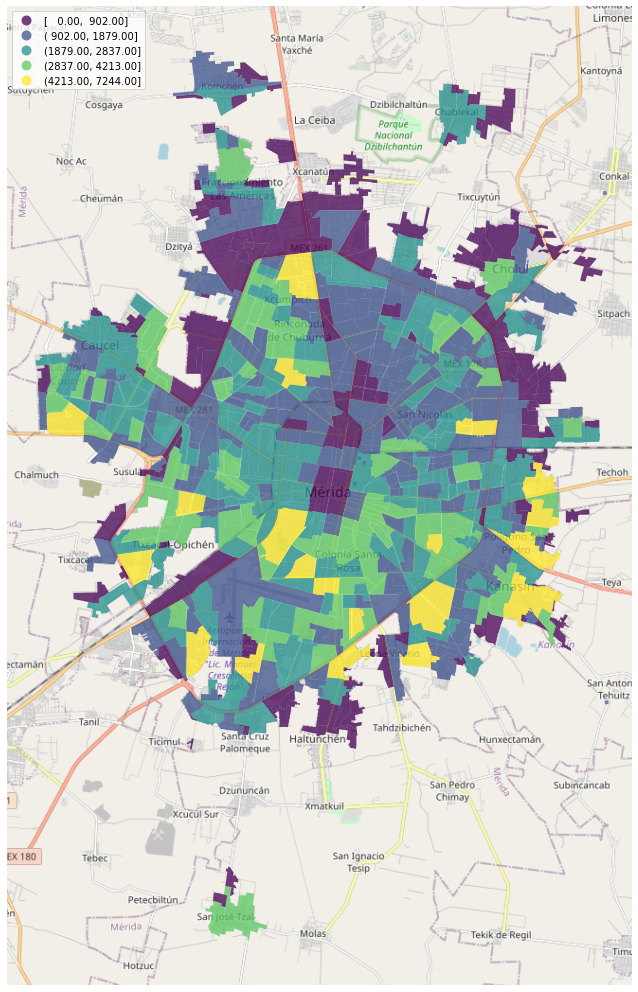

In [9]:
f, ax = plt.subplots(1, figsize=(18, 18))
db.plot(ax=ax, column='POBTOT', legend=True, scheme='fisherjenks',
         cmap='viridis' , edgecolor='black',
        k=5,
        linewidth=0., 
        alpha=0.75, 
        legend_kwds={"loc": 2},
       )
contextily.add_basemap(ax, 
                        crs=db.crs,
                       url=ctx.tile_providers.OSM_A
                      )
ax.set_axis_off()

In [10]:
# Generate W from the GeoDataFrame
w = weights.KNN.from_dataframe(db, k=8)
# Row-standardization
w.transform = 'R'

# Global spatial

# spatial lag

In [11]:
db['POBTOT_lag'] = weights.spatial_lag.lag_spatial(w, db['POBTOT'])

In [12]:
db.loc[(db['CVEGEO'] == "3105000010169")|( db['CVEGEO'] == "3105000010031")][['POBTOT', 'POBTOT_lag']]

,POBTOT,POBTOT_lag
1,253,1875.000
4,1580,853.625


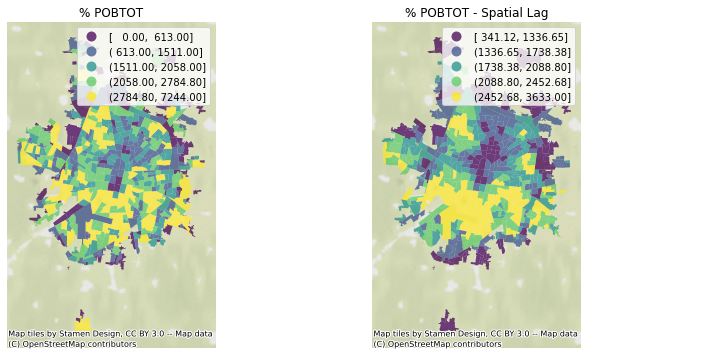

In [13]:
f, axs = plt.subplots(1, 2, figsize=(12, 6))
ax1, ax2 = axs

db.plot(column='POBTOT', cmap='viridis', scheme='quantiles',
        k=5, edgecolor='white', linewidth=0., alpha=0.75, legend=True, ax=ax1)
ax1.set_axis_off()
ax1.set_title("% POBTOT")
contextily.add_basemap(ax1, 
                       crs=db.crs, 
                       source=contextily.providers.Stamen.TerrainBackground,
                       
                      )

db.plot(column='POBTOT_lag', cmap='viridis', scheme='quantiles',
        k=5, edgecolor='white', linewidth=0., alpha=0.75, legend=True, ax=ax2)
ax2.set_axis_off()
ax2.set_title("% POBTOT - Spatial Lag")
contextily.add_basemap(ax2, 
                       crs=db.crs, 
                       source=contextily.providers.Stamen.TerrainBackground,
                       
                      )

plt.show()

# Binary case 

In [14]:
db['Total'] = (db['POBTOT'] > 50).astype(int)
db[['POBTOT', 'Total']].tail()

,POBTOT,Total
588,2649,1
589,1089,1
590,1971,1
591,495,1
592,1849,1


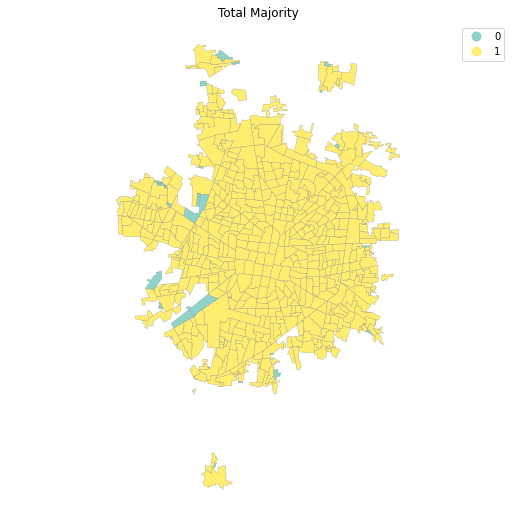

In [15]:
f, ax = plt.subplots(1, figsize=(9, 9))
db.plot(ax=ax, column='Total', categorical=True, legend=True, 
        edgecolor='0.5', linewidth=0.25, cmap='Set3', 
        figsize=(9, 9));
ax.set_axis_off()
ax.set_title('Total Majority')
plt.axis('equal')
plt.show()

In [16]:
w.transform

'R'

In [17]:
w.transform = 'O'

In [18]:
w.transform

'O'

In [19]:
seed(1234)
jc = esda.join_counts.Join_Counts(db['Total'], w)
jc

In [20]:
jc.bb

2180.5

In [21]:
jc.ww

11.5

In [22]:
jc.bw

180.0

In [23]:
jc.bb + jc.ww + jc.bw

2372.0

In [24]:
jc.J

2372.0

In [25]:
jc.mean_bb

2160.6451451451453

In [26]:
jc.mean_bw

206.6061061061061

In [27]:
jc.p_sim_bb

0.001

In [28]:
jc.p_sim_bw

1.0

# Continuous case

In [29]:
db['POBTOT_std'] = ( db['POBTOT'] - db['POBTOT'].mean() )\
                    / db['POBTOT'].std()
db['Total_lag_std'] = ( db['POBTOT_lag'] - db['POBTOT_lag'].mean() )\
                    / db['POBTOT_lag'].std()

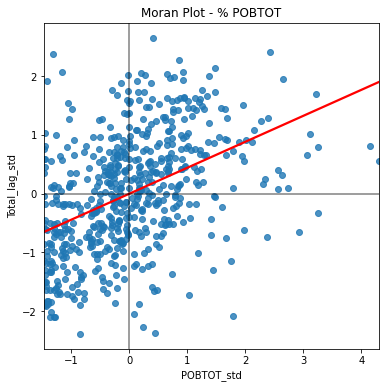

In [30]:
f, ax = plt.subplots(1, figsize=(6, 6))
seaborn.regplot(x='POBTOT_std', y='Total_lag_std', 
                ci=None, data=db, line_kws={'color':'r'})
ax.axvline(0, c='k', alpha=0.5)
ax.axhline(0, c='k', alpha=0.5)
ax.set_title('Moran Plot - % POBTOT')
plt.show()

In [31]:
w.transform = 'R'
moran = esda.moran.Moran(db['POBTOT'], w)
moran

In [32]:
moran.I

0.2297205015564677

In [33]:
moran.p_sim

0.001

UnboundLocalError: local variable 'fig' referenced before assignment

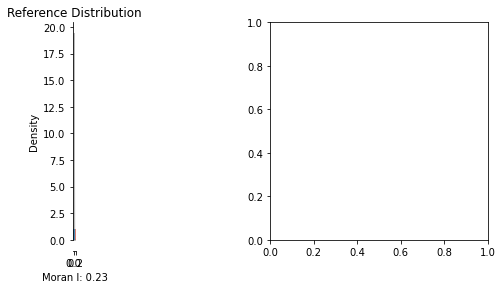

In [34]:
plot_moran(moran)